# Prepare Panel

In [1]:
import os
import re
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../../data/cleaned-data/"

In [3]:
income = pd.read_csv(DATA_DIR+"countyincome_merged.csv")
income.head()

,GEOFIPS,COUNTY,NUM_RETURN,NUM_EXEMPT,AGI,WAGES_SALARIES,DIVIDENDS,INTEREST,YEAR
0,1000,ALABAMA,1595185.0,3557069.0,39454560.0,31125750.0,638076.0,2392059.0,1989
1,1001,Autauga,13674.0,31869.0,333060.0,279230.0,3115.0,13269.0,1989
2,1003,Baldwin,39202.0,86819.0,957370.0,673040.0,24108.0,82778.0,1989
3,1005,Barbour,9367.0,21385.0,193510.0,153190.0,2729.0,12946.0,1989
4,1007,Bibb,6347.0,15087.0,129680.0,107400.0,924.0,5794.0,1989


In [4]:
gini = pd.read_csv(DATA_DIR+"census_gini_all_const.csv")
gini.head()

,STATE,COUNTY,GEOFIPS,GINI,YEAR
0,Alabama,AUTAUGA,1001,0.400131,1989.0
1,Alabama,BALDWIN,1003,0.425340,1989.0
2,Alabama,BARBOUR,1005,0.480382,1989.0
3,Alabama,BIBB,1007,0.452399,1989.0
4,Alabama,BLOUNT,1009,0.419520,1989.0


In [5]:
merged = income.merge(gini, how="inner", left_on=["YEAR", "GEOFIPS"], right_on=["YEAR", "GEOFIPS"])

In [6]:
year_count = merged.groupby("GEOFIPS")["YEAR"].count()
valid_counties = np.array(year_count[year_count == 31].index)

In [7]:
merged_complete = merged[merged["GEOFIPS"].isin(valid_counties)]
merged_complete = merged_complete[["YEAR", "GEOFIPS", "GINI", "NUM_RETURN", "NUM_EXEMPT", "AGI", "WAGES_SALARIES", "DIVIDENDS", "INTEREST"]]
merged_complete["TAXABLE_TOTAL"] = merged["WAGES_SALARIES"] + merged["DIVIDENDS"] + merged["INTEREST"]
merged_complete

,YEAR,GEOFIPS,GINI,NUM_RETURN,NUM_EXEMPT,AGI,WAGES_SALARIES,DIVIDENDS,INTEREST,TAXABLE_TOTAL
0,1989,1001,0.400131,13674.0,31869.0,333060.0,279230.0,3115.0,13269.0,295614.0
1,1989,1003,0.425340,39202.0,86819.0,957370.0,673040.0,24108.0,82778.0,779926.0
2,1989,1005,0.480382,9367.0,21385.0,193510.0,153190.0,2729.0,12946.0,168865.0
3,1989,1007,0.452399,6347.0,15087.0,129680.0,107400.0,924.0,5794.0,114118.0
4,1989,1009,0.419520,13270.0,31010.0,294430.0,241690.0,1984.0,14595.0,258269.0
...,...,...,...,...,...,...,...,...,...,...
97267,2019,56037,0.413400,20050.0,39870.0,1461220.0,1104920.0,17977.0,8761.0,1131658.0
97268,2019,56039,0.508700,14870.0,24920.0,4646008.0,1148792.0,862698.0,410116.0,2421606.0
97269,2019,56041,0.367900,9370.0,19790.0,588952.0,452641.0,7644.0,3705.0,463990.0
97270,2019,56043,0.389200,3740.0,7250.0,239110.0,150977.0,6117.0,3000.0,160094.0


In [8]:
merged_complete.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,94953.0,2.004000e+03,8.944319e+00,1989.00000,1996.000000,2004.000000,2.012000e+03,2.019000e+03
GEOFIPS,94953.0,3.096007e+04,1.484953e+04,1001.00000,19099.000000,30017.000000,4.602500e+04,5.604500e+04
GINI,94953.0,4.341409e-01,3.828326e-02,0.27121,0.407577,0.431576,4.579186e-01,6.962000e-01
NUM_RETURN,94953.0,3.496766e+04,9.791679e+04,-1.00000,4162.000000,9480.000000,2.450000e+04,2.553690e+06
NUM_EXEMPT,94953.0,7.222695e+04,1.976223e+05,-1.00000,9130.000000,20618.000000,5.246900e+04,5.042326e+06
AGI,94953.0,1.867418e+06,6.516120e+06,-198783.00000,139677.000000,355558.000000,1.046445e+06,2.146214e+08
WAGES_SALARIES,94953.0,1.354905e+06,4.575418e+06,0.00000,100675.000000,260086.000000,7.635120e+05,1.459489e+08
DIVIDENDS,94953.0,4.082650e+04,2.176714e+05,-1.00000,1626.000000,4692.000000,1.642400e+04,1.321019e+07
INTEREST,94953.0,4.732467e+04,2.634287e+05,-1.00000,3705.000000,9098.000000,2.495300e+04,5.264664e+07
TAXABLE_TOTAL,94953.0,1.443057e+06,4.918782e+06,0.00000,108118.000000,276155.000000,8.074260e+05,1.561677e+08


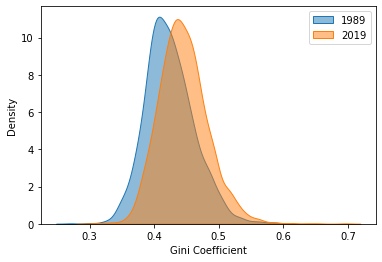

In [12]:
sns.kdeplot(merged_complete[merged_complete["YEAR"] == 1989]["GINI"], label="1989", fill=True, alpha=0.5)
sns.kdeplot(merged_complete[merged_complete["YEAR"] == 2019]["GINI"], label="2019", fill=True, alpha=0.5)
plt.xlabel("Gini Coefficient")
plt.legend()